In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/all-countries-details/All Countries.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(194, 64)

In [4]:
df.head()

,ï»¿country,country_long,currency,capital_city,region,continent,demonym,latitude,longitude,agricultural_land,...,population,women_parliament_seats_pct,rural_population,urban_population,press,democracy_score,democracy_type,median_age,political_leader,title
0,Afghanistan,Islamic State of Afghanistan,Afghan afghani,Kabul,Southern Asia,Asia,Afghan,33.0,65.0,383560.0,...,41128771,27.01610,30181937,10946834,2.14,2.97,Authoritarian,12.9,Ashraf Ghani,President
1,Albania,Republic of Albania,Albanian lek,Tirana,Southern Europe,Europe,Albanian,41.0,20.0,11655.5,...,2775634,35.71430,1004807,1770827,2.62,5.98,Hybrid regime,33.7,Edi Rama,Prime Minister
2,Algeria,People's Democratic Republic of Algeria,Algerian dinar,Algiers,Northern Africa,Africa,Algerian,28.0,3.0,413588.0,...,44903225,8.10811,11328186,33575039,1.71,3.50,Authoritarian,24.0,Abdelmadjid Tebboune,President
3,Andorra,Principality of Andorra,Euro,Andorra la Vella,Southern Europe,Europe,Andorran,42.5,1.5,187.2,...,79824,46.42860,9730,70094,3.17,0.00,Unknown,38.9,Xavier Espot Zamora,Head of Government
4,Angola,People's Republic of Angola,Angolan kwanza,Luanda,Middle Africa,Africa,Angolan,-12.5,18.5,569525.0,...,35588987,33.63640,11359649,24229338,2.24,3.62,Authoritarian,12.4,JoÃ£o LourenÃ§o,President


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 64 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ï»¿country                               194 non-null    object 
 1   country_long                             194 non-null    object 
 2   currency                                 194 non-null    object 
 3   capital_city                             194 non-null    object 
 4   region                                   194 non-null    object 
 5   continent                                194 non-null    object 
 6   demonym                                  194 non-null    object 
 7   latitude                                 194 non-null    float64
 8   longitude                                194 non-null    float64
 9   agricultural_land                        193 non-null    float64
 10  forest_area                              194 non-n

In [6]:
pd.isnull(df).sum()

ï»¿country          0
country_long        0
currency            0
capital_city        0
region              0
                   ..
democracy_score     0
democracy_type      0
median_age          0
political_leader    7
title               7
Length: 64, dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.columns

Index(['ï»¿country', 'country_long', 'currency', 'capital_city', 'region',
       'continent', 'demonym', 'latitude', 'longitude', 'agricultural_land',
       'forest_area', 'land_area', 'rural_land', 'urban_land',
       'central_government_debt_pct_gdp', 'expense_pct_gdp', 'gdp',
       'inflation', 'self_employed_pct', 'tax_revenue_pct_gdp',
       'unemployment_pct', 'vulnerable_employment_pct',
       'electricity_access_pct', 'alternative_nuclear_energy_pct',
       'electricty_production_coal_pct',
       'electricty_production_hydroelectric_pct',
       'electricty_production_gas_pct', 'electricty_production_nuclear_pct',
       'electricty_production_oil_pct', 'electricty_production_renewable_pct',
       'energy_imports_pct', 'fossil_energy_consumption_pct',
       'renewable_energy_consumption_pct', 'co2_emissions',
       'methane_emissions', 'nitrous_oxide_emissions',
       'greenhouse_other_emissions', 'urban_population_under_5m',
       'health_expenditure_pct_gdp', 'he

In [9]:
df.describe()

,latitude,longitude,agricultural_land,forest_area,land_area,rural_land,urban_land,central_government_debt_pct_gdp,expense_pct_gdp,gdp,...,net_migration,population_female,population_male,population,women_parliament_seats_pct,rural_population,urban_population,press,democracy_score,median_age
count,28.00000,28.000000,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,28.000000,28.000000,28.000000,2.800000e+01,...,28.000000,2.800000e+01,2.800000e+01,2.800000e+01,28.000000,2.800000e+01,2.800000e+01,28.000000,28.00000,28.000000
mean,17.35119,21.577381,4.323244e+05,4.285716e+05,1.089341e+06,1.081065e+06,17212.246179,81.933522,30.602478,4.025933e+11,...,-28144.035714,5.323517e+07,5.434893e+07,1.075841e+08,23.436837,5.694555e+07,5.063855e+07,2.099643,5.10500,24.157143
std,18.81075,67.358818,6.389033e+05,9.494191e+05,1.673840e+06,1.676714e+06,34989.453656,125.351761,55.542840,7.523540e+11,...,83717.832750,1.288186e+08,1.371147e+08,2.659194e+08,11.271920,1.700212e+08,1.009563e+08,0.540565,1.67502,7.664561
min,-17.00000,-102.000000,1.341290e+03,1.433300e+03,9.240000e+03,8.546200e+03,420.263000,0.000000,6.295710,1.093060e+10,...,-301970.000000,6.247130e+05,6.267750e+05,1.251488e+06,5.333330,4.141050e+05,8.373830e+05,1.080000,1.49000,11.700000
25%,5.50000,-17.500000,4.549075e+04,2.069542e+04,1.010315e+05,8.149625e+04,2070.247500,31.387725,14.372050,4.402342e+10,...,-39698.750000,4.731618e+06,4.600468e+06,9.332087e+06,15.206725,4.082480e+06,4.859571e+06,1.732500,3.71000,19.475000
50%,15.00000,32.500000,1.710400e+05,1.337925e+05,4.918000e+05,4.778645e+05,3708.735000,56.971800,19.303550,7.656235e+10,...,-15107.500000,1.559226e+07,1.553633e+07,3.110506e+07,20.392750,1.147514e+07,1.662457e+07,2.150000,5.58500,24.500000
75%,34.12500,75.500000,4.304395e+05,5.291082e+05,1.427000e+06,1.416110e+06,13181.450000,79.539300,27.241075,3.590252e+11,...,-835.500000,5.163907e+07,5.150835e+07,1.031474e+08,29.286850,3.457439e+07,4.351533e+07,2.455000,6.43500,28.125000
max,49.00000,122.000000,2.368790e+06,4.966200e+06,8.358140e+06,8.385500e+06,171839.000000,687.994000,310.443000,3.385090e+12,...,211978.000000,6.859927e+08,7.311805e+08,1.417173e+09,50.000000,9.088048e+08,5.083684e+08,3.600000,7.59000,40.000000


In [10]:
# use describe() for specific columns
df[['region', 'currency', 'population']].describe()

,population
count,2.800000e+01
mean,1.075841e+08
std,2.659194e+08
min,1.251488e+06
25%,9.332087e+06
50%,3.110506e+07
75%,1.031474e+08
max,1.417173e+09


# Exploratory Data Analysis

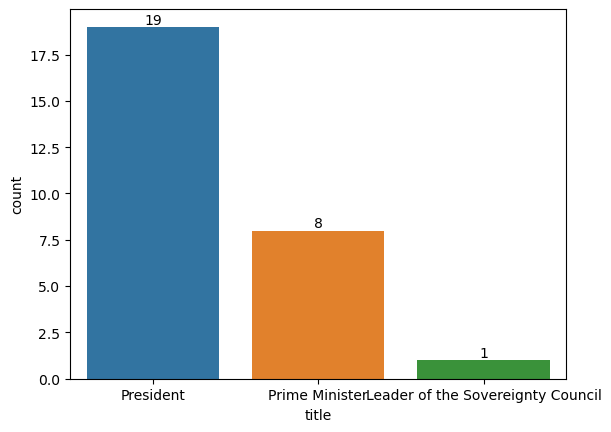

In [11]:
ax = sns.countplot(x = 'title',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

**population controlled**

<Axes: xlabel='title', ylabel='population'>

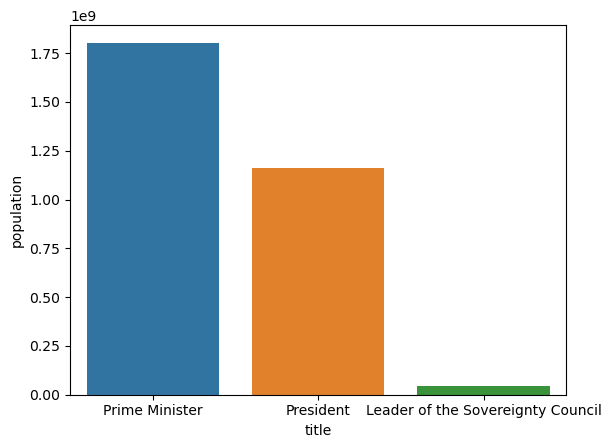

In [12]:
sales_gen = df.groupby(['title'], as_index=False)['population'].sum().sort_values(by='population', ascending=False)

sns.barplot(x = 'title',y= 'population' ,data = sales_gen)

<Axes: xlabel='population', ylabel='capital_city'>

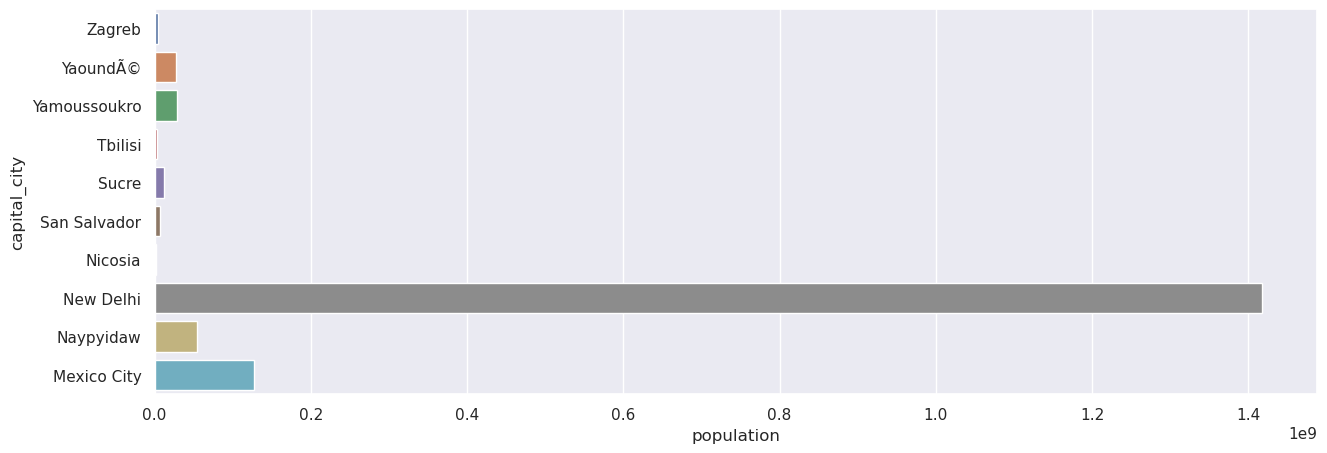

In [13]:
# total number of orders from top 10 states

population = df.groupby(['population'], as_index=False)['capital_city'].sum().sort_values(by='capital_city', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = population, x = 'population',y= 'capital_city')

**democracy_score**

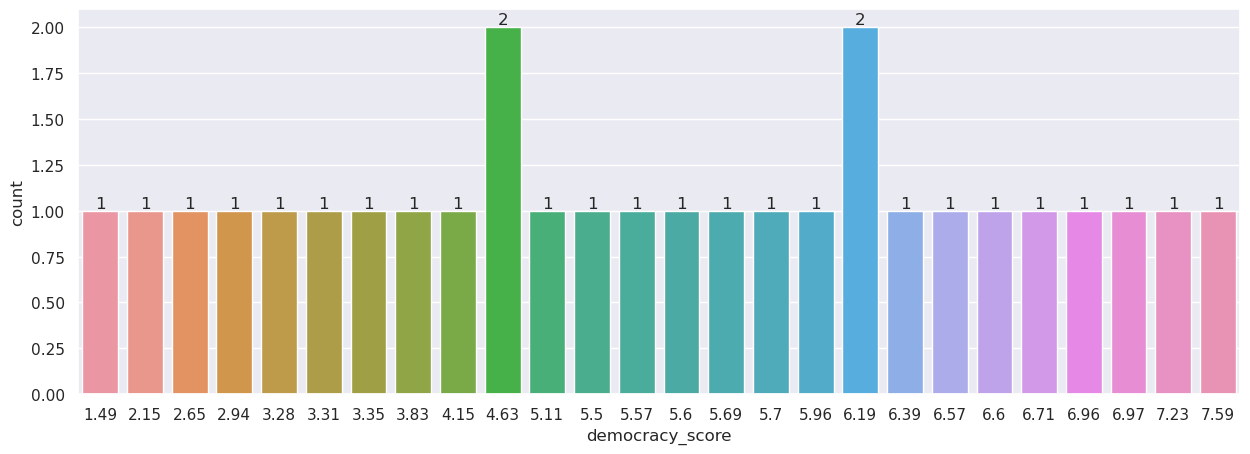

In [14]:
ax = sns.countplot(data = df, x = 'democracy_score')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='democracy_score', ylabel='democracy_type'>

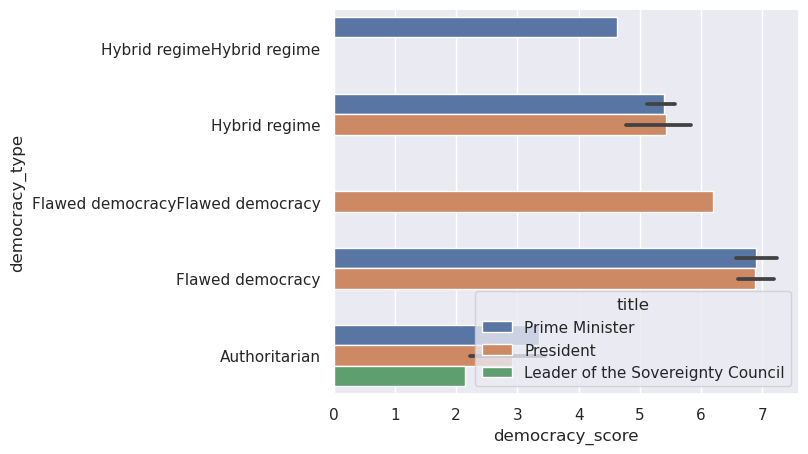

In [15]:
sales_state = df.groupby(['democracy_score', 'title'], as_index=False)['democracy_type'].sum().sort_values(by='democracy_type', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'democracy_score',y= 'democracy_type', hue='title')

**women_parliament_seats_pct**

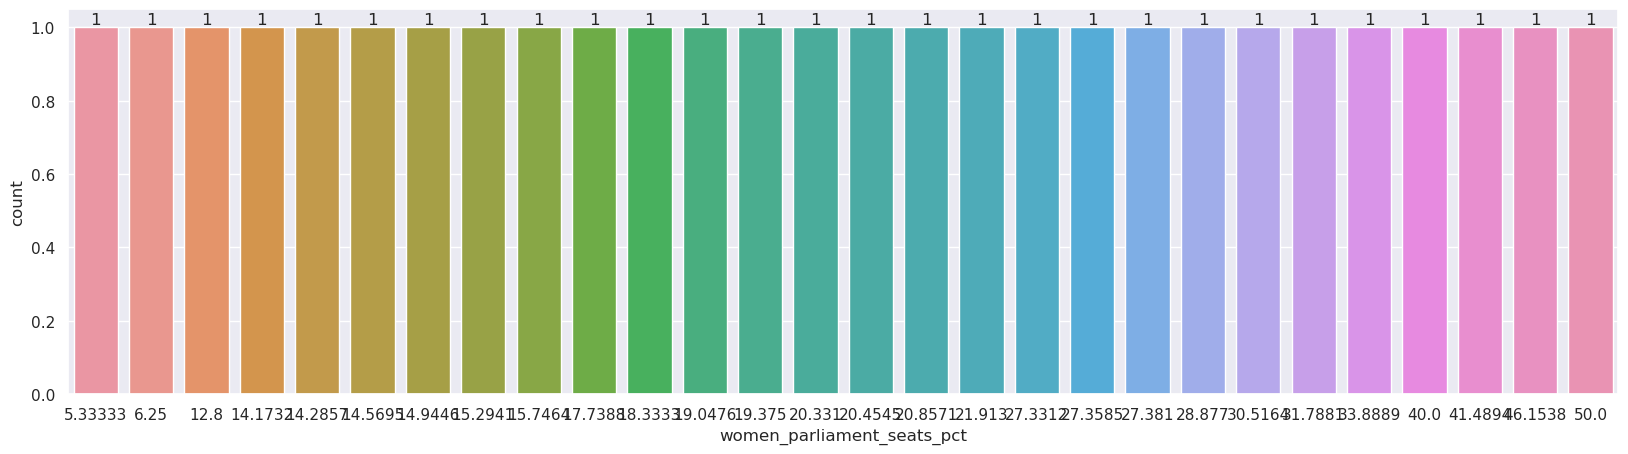

In [16]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'women_parliament_seats_pct')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='women_parliament_seats_pct', ylabel='capital_city'>

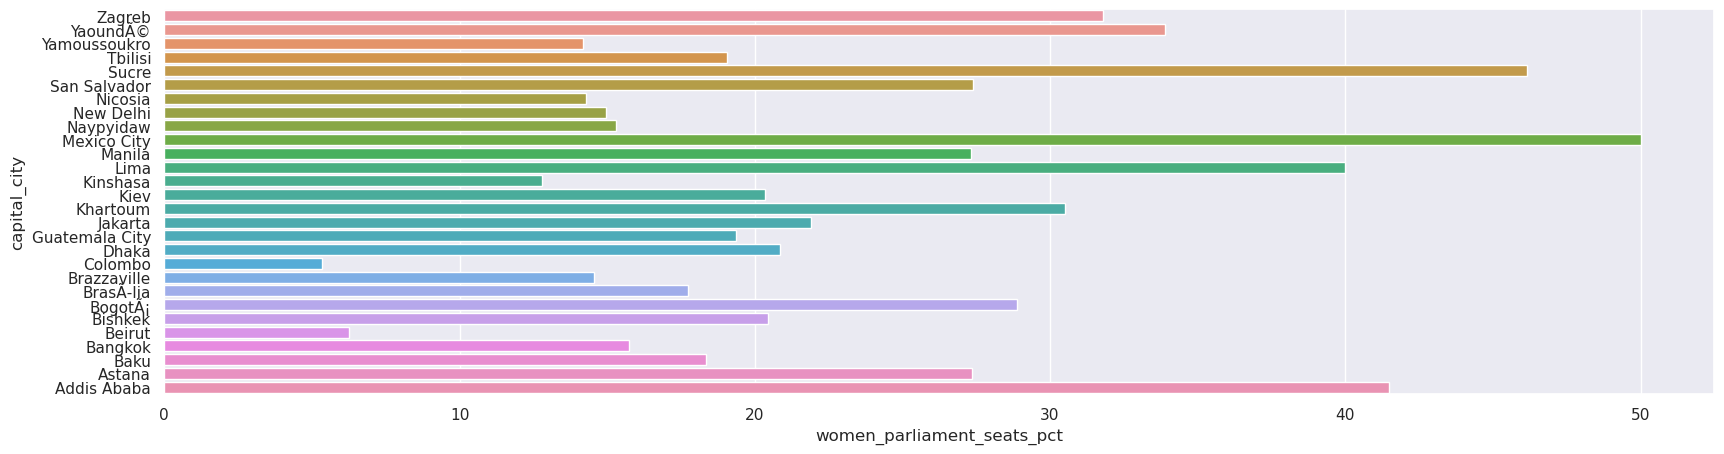

In [17]:
sales_state = df.groupby(['women_parliament_seats_pct'], as_index=False)['capital_city'].sum().sort_values(by='capital_city', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'women_parliament_seats_pct',y= 'capital_city')